In [ ]:
# Dependencies
import pandas as pd                     # for handling and structuring data
import matplotlib.pyplot as plt         # for creating plots
import scipy.stats as st                # for statistical functions
import numpy as np                      # for generating random numbers and handling numerical operations
from scipy.stats import linregress      # for calculating linear regression

# need to switch to csv
# Load the Excel file
file_path = 'Most Streamed Spotify Songs 2024 - Research.xlsx'
xls = pd.ExcelFile(file_path)

# Display sheet names to identify relevant data
print(xls.sheet_names)


['Views', 'Likes', 'Most Streamed Spotify Songs 202']


In [2]:
# Load the 'Likes' sheet
likes_df = pd.read_excel(xls, sheet_name='Likes', skiprows=2)

# Rename 'Row Labels' column
likes_df.rename(columns={'Row Labels': 'Song Title'}, inplace=True)

# Load the 'Views' sheet
views_df = pd.read_excel(xls, sheet_name='Views', skiprows=2)
views_df.rename(columns={'Row Labels': 'Song Title'}, inplace=True)

most_streamed_df = pd.read_excel(xls, sheet_name='Most Streamed Spotify Songs 202')

views_df.head()

,Song Title,Max of Spotify Popularity,Min of All Time Rank,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Monkeys Spinning Monkeys,36.0,1018,11477477.0,11457166.0,2.332323e+11
1,Love You So,44.0,1918,16326628.0,7603329.0,2.148440e+11
2,Oh No,41.0,473,40284121.0,17978707.0,6.108856e+10
3,Funny Song,39.0,1539,5866282.0,11793478.0,3.994631e+10
4,Aesthetic,44.0,114,33025746.0,6658234.0,3.985063e+10


In [3]:
# Ensure that the key columns have consistent names across DataFrames to facilitate merging
likes_df.rename(columns={'Song Title': 'Song'}, inplace=True)
views_df.rename(columns={'Song Title': 'Song'}, inplace=True)

# Select relevant columns
likes_df = likes_df[['Song', 'Sum of TikTok Likes', 'Sum of YouTube Likes']]
views_df = views_df[['Song', 'Max of Spotify Popularity', 'Sum of Spotify Streams', 'Sum of YouTube Views', 'Sum of TikTok Views']]

views_df.head()

,Song,Max of Spotify Popularity,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Monkeys Spinning Monkeys,36.0,11477477.0,11457166.0,2.332323e+11
1,Love You So,44.0,16326628.0,7603329.0,2.148440e+11
2,Oh No,41.0,40284121.0,17978707.0,6.108856e+10
3,Funny Song,39.0,5866282.0,11793478.0,3.994631e+10
4,Aesthetic,44.0,33025746.0,6658234.0,3.985063e+10


In [4]:
# Combine the two DataFrames based on the 'Song' column
merged_df = pd.merge(likes_df, views_df, on='Song', how='inner')

merged_df.head()

,Song,Sum of TikTok Likes,Sum of YouTube Likes,Max of Spotify Popularity,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Without Me,2.354115e+08,38043329.0,83.0,6.336157e+09,4.304317e+09,2.394606e+09
1,Blinding Lights,3.373226e+08,10093211.0,83.0,8.542797e+09,8.338071e+08,3.501177e+09
2,goosebumps,2.049043e+08,13556723.0,82.0,2.892012e+09,1.413468e+09,1.899768e+09
3,Heat Waves,5.133344e+08,14947520.0,82.0,2.996181e+09,1.272898e+09,5.518430e+09
4,STAY (with Justin Bieber),2.246991e+09,14661425.0,78.0,6.214201e+09,1.256974e+09,2.371238e+10


In [ ]:
# Remove rows with missing values
merged_df.dropna(inplace=True)

# how do we apply this to the merge file?
def format_number(num):
    if abs(num) >= 1_000_000_000:
        return f"{num/1_000_000_000:.1f}B"
    elif abs(num) >= 1_000_000:
        return f"{num/1_000_000:.1f}M"
    elif abs(num) >= 1_000:
        return f"{num/1_000:.1f}K"
    else:
        return f"{num:.1f}"

merged_df

,Song,Sum of TikTok Likes,Sum of YouTube Likes,Max of Spotify Popularity,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Without Me,2.354115e+08,3.804333e+07,83.0,6.336157e+09,4.304317e+09,2.394606e+09
1,Blinding Lights,3.373226e+08,1.009321e+07,83.0,8.542797e+09,8.338071e+08,3.501177e+09
2,goosebumps,2.049043e+08,1.355672e+07,82.0,2.892012e+09,1.413468e+09,1.899768e+09
3,Heat Waves,5.133344e+08,1.494752e+07,82.0,2.996181e+09,1.272898e+09,5.518430e+09
4,STAY (with Justin Bieber),2.246991e+09,1.466142e+07,78.0,6.214201e+09,1.256974e+09,2.371238e+10
...,...,...,...,...,...,...,...
4154,Joy (In My Own Time) - Tribe Song,8.070000e+02,3.006170e+05,3.0,6.300000e+03,3.715798e+08,2.925100e+04
4161,Hands,1.880000e+02,7.208467e+06,1.0,1.269140e+05,2.435814e+09,6.415000e+03
4165,Semangat Kerjanya Kawan,8.929235e+06,3.730000e+02,1.0,3.264200e+04,5.039100e+04,2.359136e+08
4186,Eid,1.997761e+07,3.181930e+05,4.0,1.076200e+04,2.081933e+07,2.744912e+08


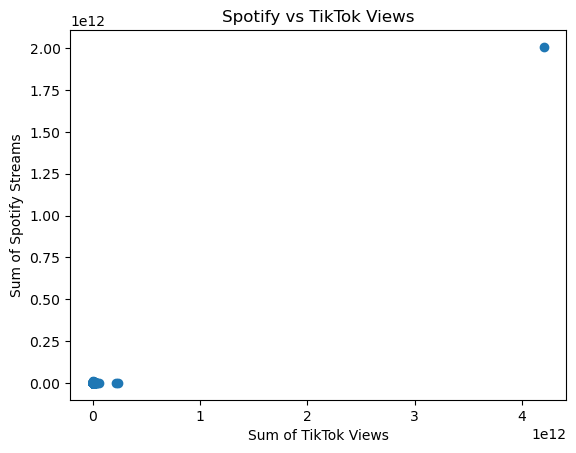

In [6]:
# Spotify vs TikTok Views
# Does high TikTok views correlate to high spotify streams?

# Create a scatterplot
plt.scatter(merged_df['Sum of TikTok Views'], merged_df['Sum of Spotify Streams'])
plt.xlabel('Sum of TikTok Views')
plt.ylabel('Sum of Spotify Streams')
plt.title('Spotify vs TikTok Views')
plt.show()

# this ended up not looking great - going to reduce down to the top 25 instead

In [10]:
# Does the top 500 most viewed TikTok songs have high spotify streaming?

# Create a bar chat

# Sort DataFrame by TikTok Views in descending order
top_500_tiktok_df = merged_df.sort_values(by='Sum of TikTok Views', ascending=False).head(501)

# Remove the 'Grand Total' row
top_500_tiktok_df = top_500_tiktok_df[top_500_tiktok_df['Song'] != 'Grand Total']

# Display top 500 TikTok-viewed songs with their Spotify Streams
top_500_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams']]


,Song,Sum of TikTok Views,Sum of Spotify Streams
3201,Monkeys Spinning Monkeys,2.332323e+11,1.147748e+07
2962,Love You So,2.148440e+11,1.632663e+07
2863,Oh No,6.108856e+10,4.028412e+07
3500,Funny Song,3.994631e+10,5.866282e+06
3011,Aesthetic,3.985063e+10,3.302575e+07
...,...,...,...
83,Sugar,1.756611e+09,2.345935e+09
155,I WANNA BE YOUR SLAVE,1.755214e+09,1.053627e+09
197,Attention,1.748734e+09,2.309564e+09
786,Quï¿½ï¿½ Mï¿½ï¿,1.748578e+09,8.118107e+08


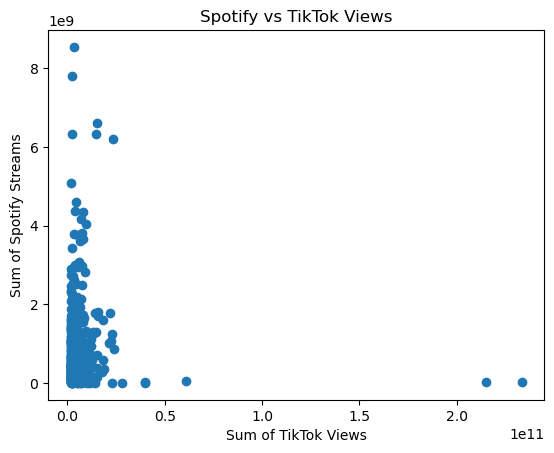

In [11]:
# Spotify vs TikTok Views
# Does high TikTok views correlate to high spotify streams?

# Create a scatterplot
plt.scatter(top_500_tiktok_df['Sum of TikTok Views'], top_500_tiktok_df['Sum of Spotify Streams'])
plt.xlabel('Sum of TikTok Views')
plt.ylabel('Sum of Spotify Streams')
plt.title('Spotify vs TikTok Views')
plt.show()

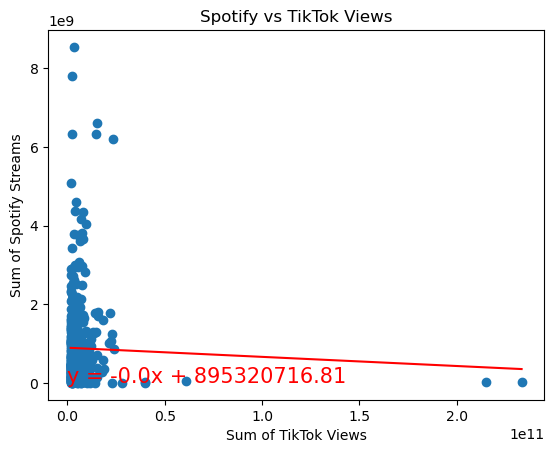

The r^2-value is: 0.0010268219830998492


In [12]:
# Add the linear regression equation and line to plot
x_values = top_500_tiktok_df["Sum of TikTok Views"]
y_values = top_500_tiktok_df["Sum of Spotify Streams"]

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

#the scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel("Sum of TikTok Views")
plt.ylabel("Sum of Spotify Streams")
plt.title("Spotify vs TikTok Views")

plt.show()

print(f"The r^2-value is: {rvalue**2}")

In [ ]:
# Does the top 10 most viewed TikTok songs have high spotify streaming?

# Create a bar chat

# Sort DataFrame by TikTok Views in descending order
top_ten_tiktok_df = top_25_tiktok_df.sort_values(by='Sum of TikTok Views', ascending=False).head(10)

# Display top 10 TikTok-viewed songs with their Spotify Streams
top_ten_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams']]


In [ ]:
# Prepare the bar chart
x = np.arange(len(top_ten_tiktok_df['Song']))  # the label locations
width = 0.25                                   # the width of the bars

# Create the subplot
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')   # constrained to prevent overlap

# Plot the bars
tiktok_bar = ax.bar(x-width/2, top_ten_tiktok_df['Sum of TikTok Views'], width, label='Sum of TikTok Views', color='blue')
spotify_bar = ax.bar(x+width/2, top_ten_tiktok_df['Sum of Spotify Streams'], width, label='Sum of Spotify Streams', color='green')

# Formatting
ax.set_ylabel('Count')
ax.set_title('TikTok Views vs. Spotify Streams')
ax.set_xticks(x)
ax.set_xticklabels(top_ten_tiktok_df['Song'], rotation=30, ha='right')  # Rotate labels for readability
ax.legend()

max_value = max(top_ten_tiktok_df['Sum of Spotify Streams'].max(), top_ten_tiktok_df['Sum of TikTok Views'].max())
ax.set_ylim(0, max_value * 1.1)          # Set y-limit slightly above max value
